# Visualization 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import seaborn as sns



In [0]:
df = pd.read_csv("pokemon_alopez247.csv", sep=",")



In [3]:
print("There are", len(df.columns), "columns:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")



There are 23 columns:
Number, Name, Type_1, Type_2, Total, HP, Attack, Defense, Sp_Atk, Sp_Def, Speed, Generation, isLegendary, Color, hasGender, Pr_Male, Egg_Group_1, Egg_Group_2, hasMegaEvolution, Height_m, Weight_kg, Catch_Rate, Body_Style, 

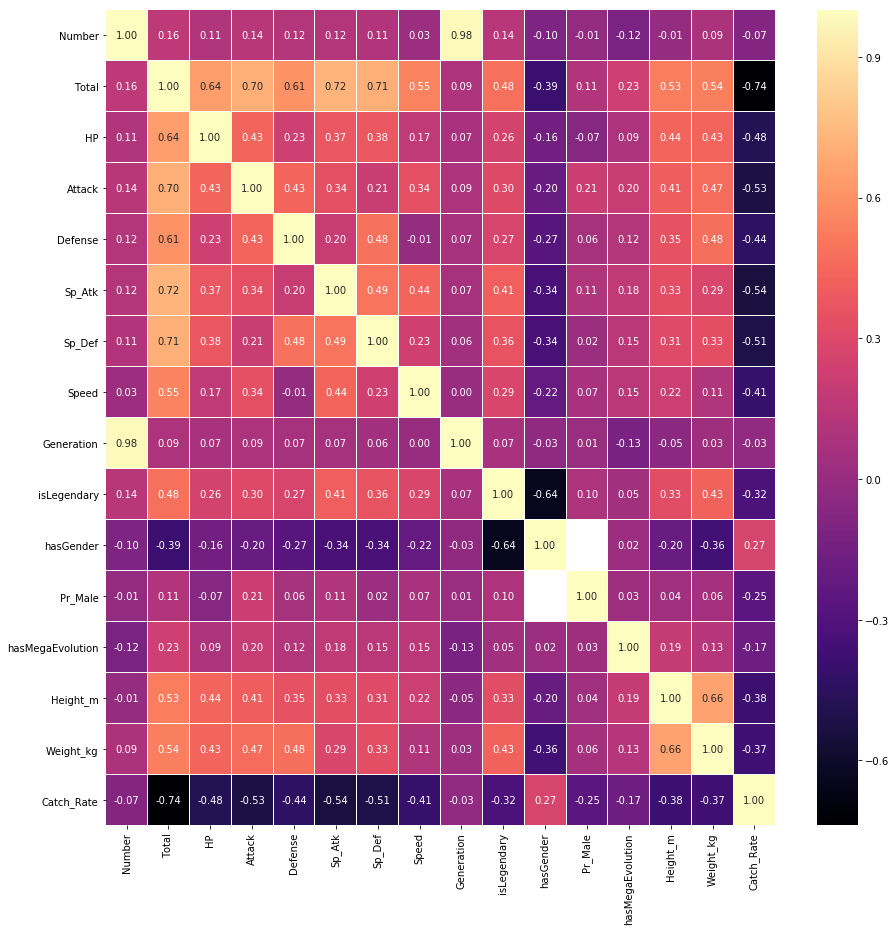

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt='.2f', cmap="magma")
plt.show()



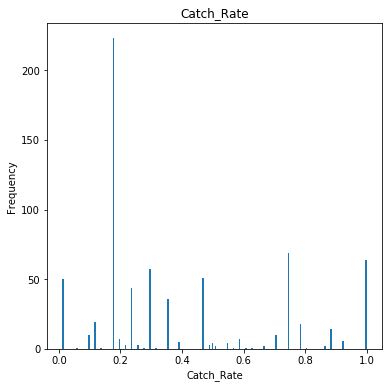

In [5]:
Catch_Rate = df["Catch_Rate"]
Catch_Rate_ = Catch_Rate/255
Catch_Rate_.plot(kind='hist', bins=200, figsize=(6, 6))
plt.title("Catch_Rate")
plt.xlabel("Catch_Rate")
plt.ylabel("Frequency")
plt.show()



In [6]:
number = df["Number"]
print('Total number of Pokemons is', len(number))
Legendary = df["isLegendary"]
rate = np.mean(Legendary == True)
print('legendary rate=', rate)



Total number of Pokemons is 721
legendary rate= 0.0638002773925104


In [0]:
# Unnecessary columns
# Number and Name are just identifiers
# Total is a aggregation of others columns
clean_df = df.drop(columns=['Number', 'Name', 'Total'])



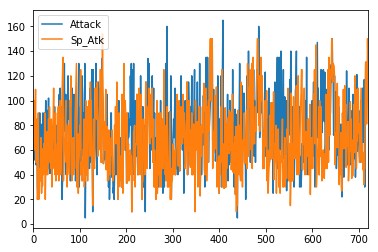

In [8]:
df2 = df.loc[:, ["Attack", "Sp_Atk"]]
df2.plot()



<function matplotlib.pyplot.show>

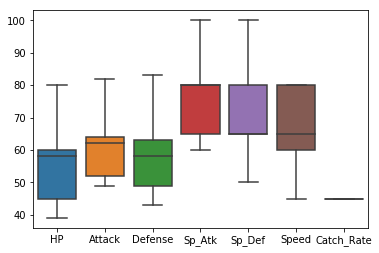

In [9]:
sns.boxplot(data=df.drop(['isLegendary', 'Generation', 'Number', 'Total', 'Color', 'hasGender', 'Pr_Male',
                          'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Body_Style'], axis=1).head())
plt.show



/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


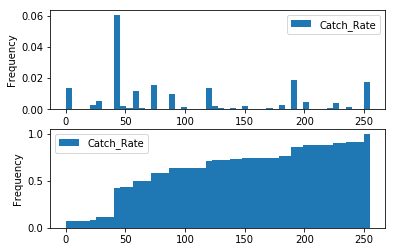

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1)
df.plot(kind="hist", y="Catch_Rate", bins=50, range=(0, 255), normed=True, ax=axes[0])
df.plot(kind="hist", y="Catch_Rate", bins=50, range=(0, 255), normed=True, ax=axes[1], cumulative=True)
plt.show()
# there's a sudden increase around 0.16 percentage of Catch_Rate



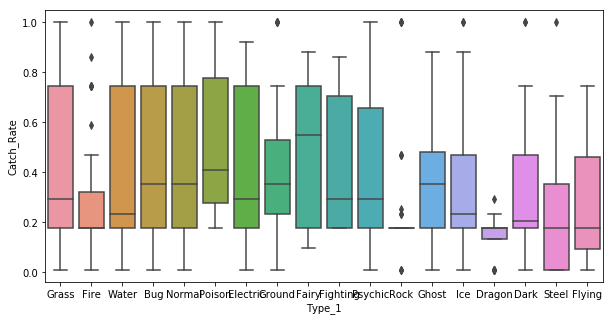

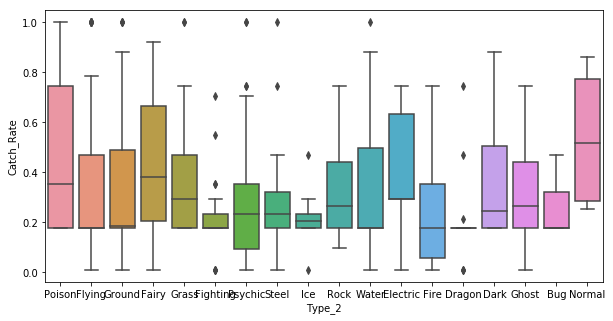

In [11]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Type_1', y=Catch_Rate_, data=df)
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Type_2', y=Catch_Rate_, data=df)



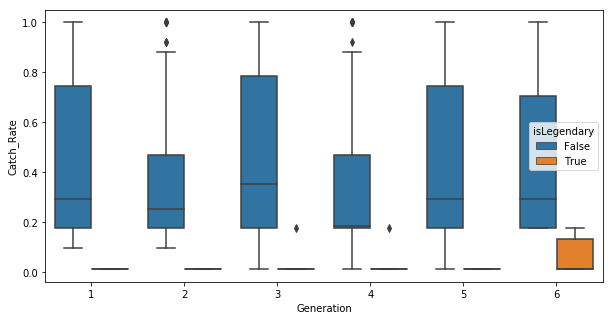

In [12]:
# If generation and islegendary relate to Catch_rate
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Generation', y=Catch_Rate_, hue='isLegendary', data=df)



In [13]:
result1 = df.drop(['Type_1', 'Type_2', 'Sp_Atk', 'Sp_Def', 'isLegendary', 'Generation', 'Number', 'Total', 'Color', 'hasGender',
                   'Pr_Male', 'Egg_Group_1', 'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Body_Style'], axis=1).head(20)
print(result1)



          Name  HP  Attack  Defense  Speed  Catch_Rate
0    Bulbasaur  45      49       49     45          45
1      Ivysaur  60      62       63     60          45
2     Venusaur  80      82       83     80          45
3   Charmander  39      52       43     65          45
4   Charmeleon  58      64       58     80          45
5    Charizard  78      84       78    100          45
6     Squirtle  44      48       65     43          45
7    Wartortle  59      63       80     58          45
8    Blastoise  79      83      100     78          45
9     Caterpie  45      30       35     45         255
10     Metapod  50      20       55     30         120
11  Butterfree  60      45       50     70          45
12      Weedle  40      35       30     50         255
13      Kakuna  45      25       50     35         120
14    Beedrill  65      90       40     75          45
15      Pidgey  40      45       40     56         255
16   Pidgeotto  63      60       55     71         120
17     Pid

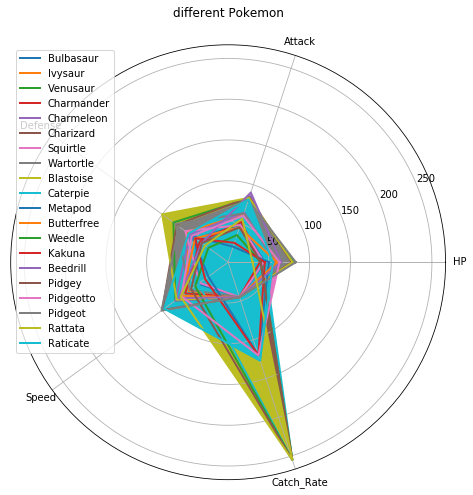

In [14]:
def result_pic(result):
    labels = ['HP', 'Attack', 'Defense', 'Speed', 'Catch_Rate']
    kinds = list(result.iloc[:, 0])

    result = pd.concat([result, result[['HP']]], axis=1)
    centers = np.array(result.iloc[:, 1:])

    n = len(labels)
    angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
    angle = np.concatenate((angle, [angle[0]]))
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    for i in range(len(kinds)):
        ax.plot(angle, centers[i], linewidth=2, label=kinds[i])
        ax.fill(angle, centers[i])

    ax.set_thetagrids(angle * 180 / np.pi, labels)
    plt.title('different Pokemon')
    plt.legend(loc='upper left')
    plt.show()


if __name__ == '__main__':
    result = result1
    result_pic(result)



/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<function matplotlib.pyplot.show>

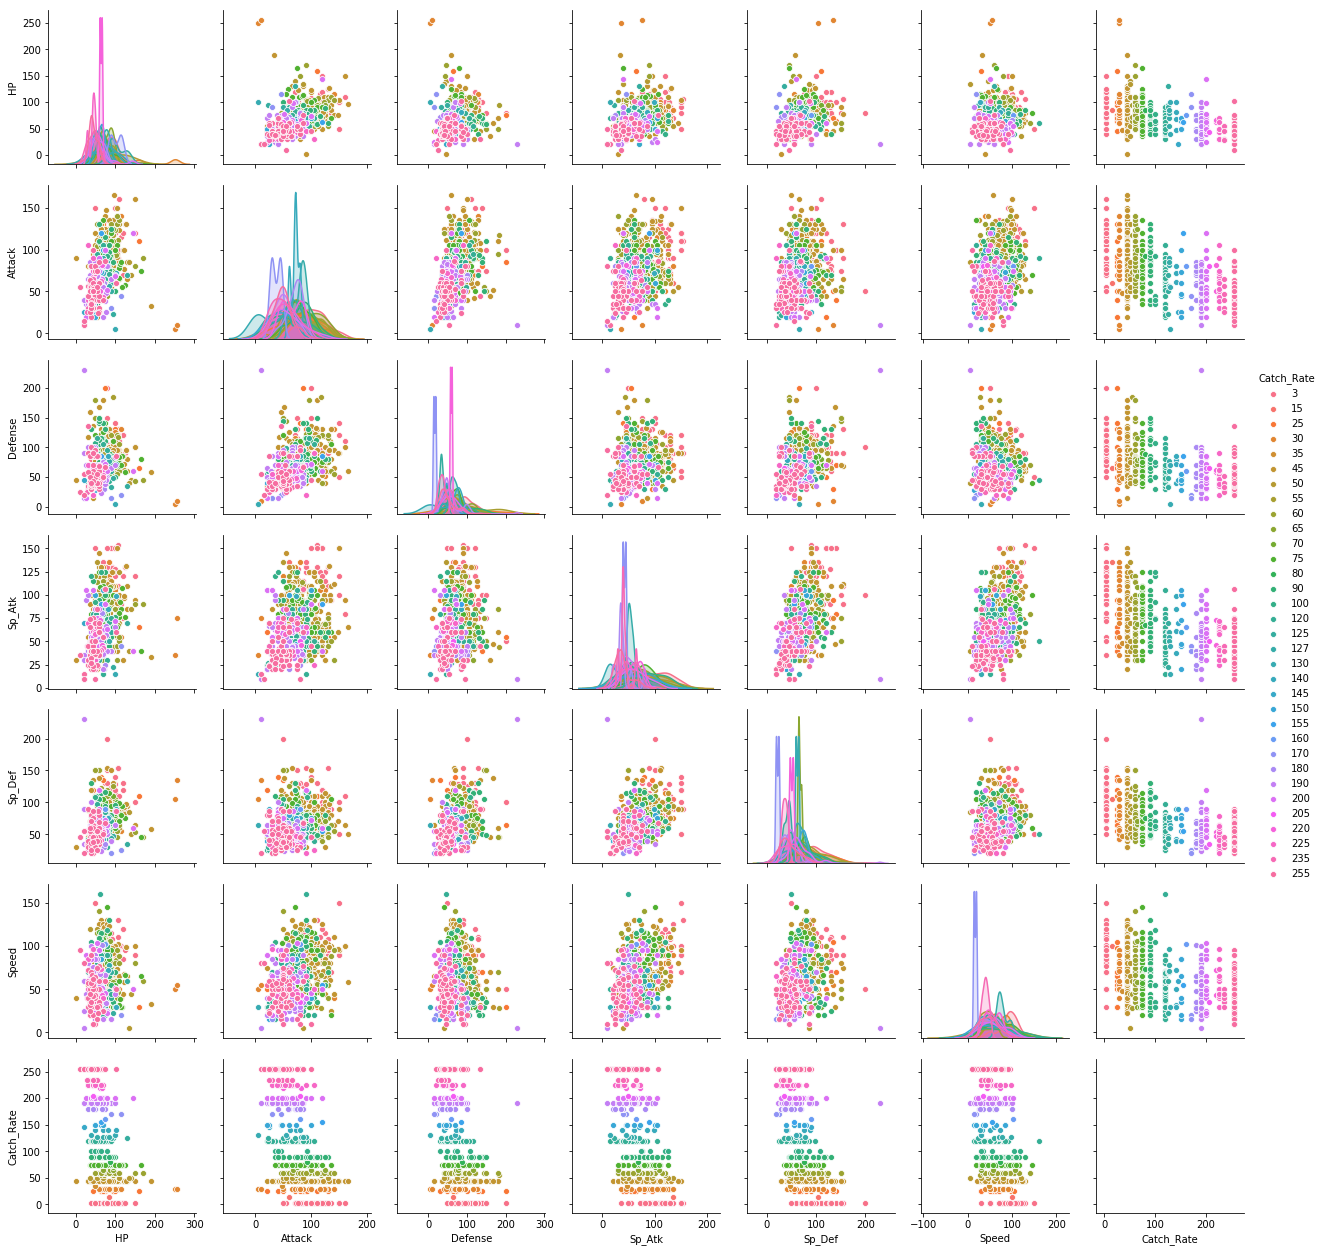

In [15]:
sns.pairplot(data=df.drop(['isLegendary', 'Generation', 'Number', 'Total', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1',
                           'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Body_Style'], axis=1), hue='Catch_Rate')
plt.show



In [16]:
df.describe()



,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


In [0]:
df1 = df.groupby('Type_1')['Type_1'].count().reset_index(name='Count')
df1 = df1.sort_values(by='Count')



Text(0.5, 1.0, 'Type Distribution')

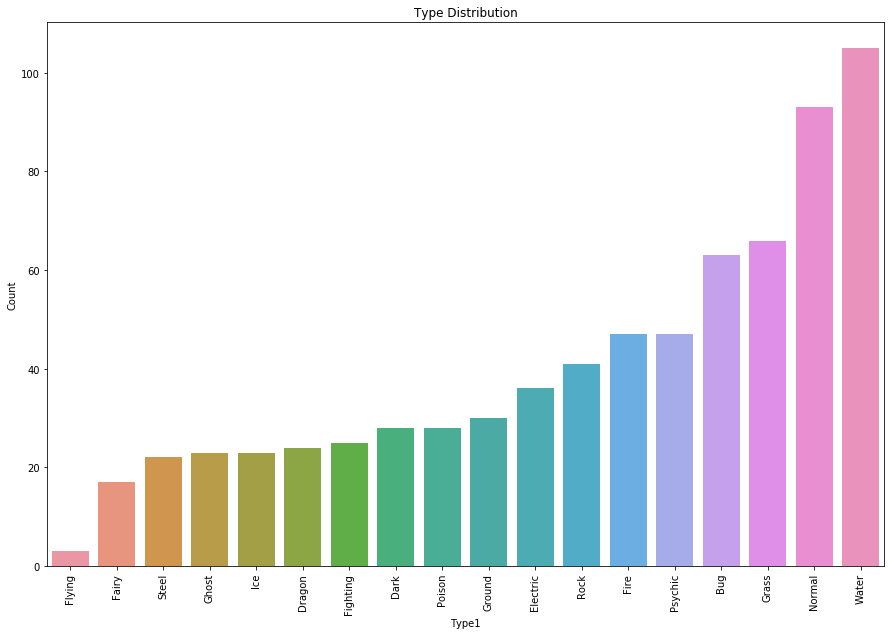

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x=df1['Type_1'], y=df1['Count'])
plt.xticks(rotation=90)
plt.xlabel('Type1')
plt.ylabel('Count')
plt.title('Type Distribution')



In [0]:
df2 = df.groupby('Type_2')['Type_2'].count().reset_index(name='Count')
df2 = df2.sort_values(by='Count')



Text(0.5, 1.0, 'Type Distribution')

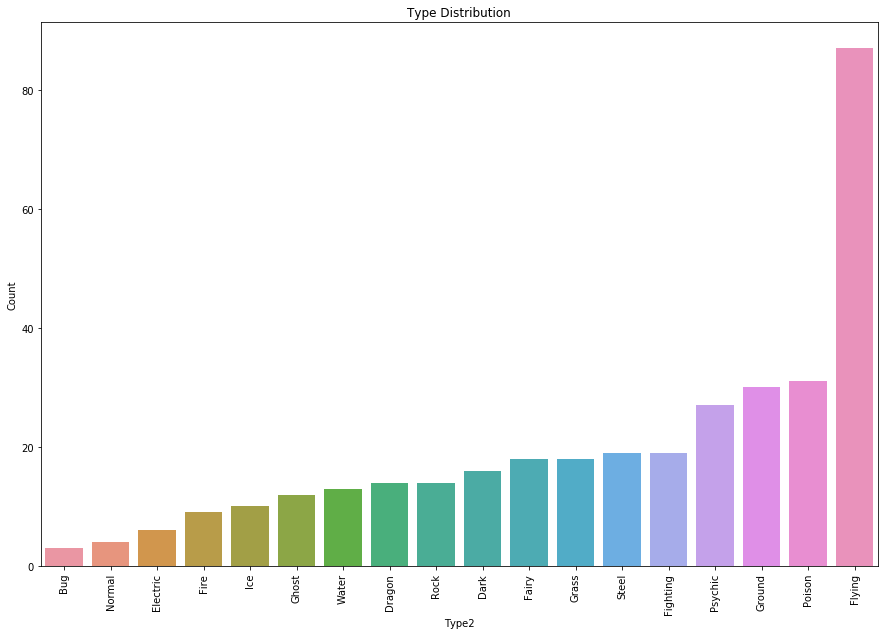

In [20]:
plt.figure(figsize=(15, 10))
sns.barplot(x=df2['Type_2'], y=df2['Count'])
plt.xticks(rotation=90)
plt.xlabel('Type2')
plt.ylabel('Count')
plt.title('Type Distribution')



Text(0.5, 1.0, 'Group Distribution')

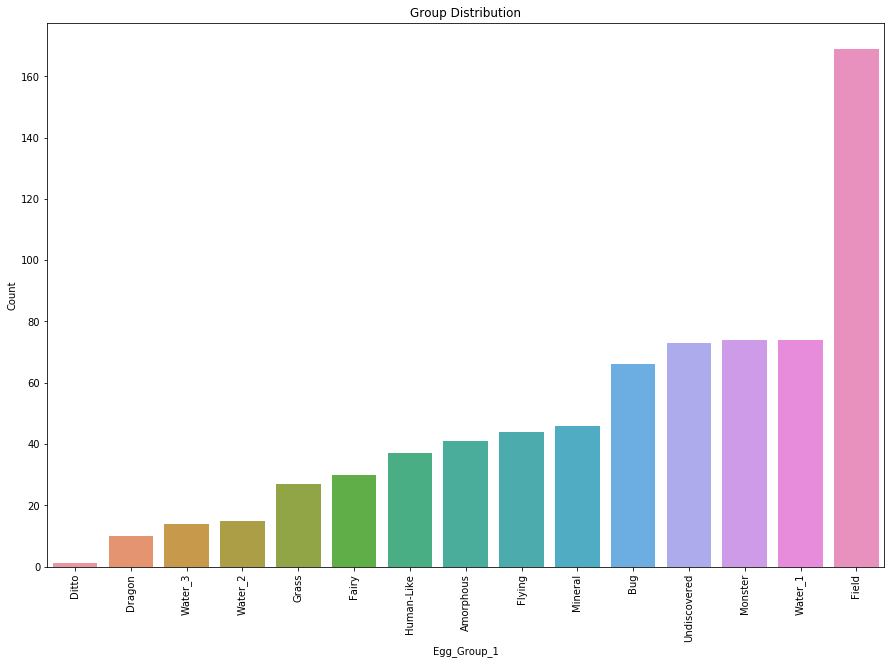

In [21]:
df3 = df.groupby('Egg_Group_1')['Egg_Group_1'].count().reset_index(name='Count')
df3 = df3.sort_values(by='Count')
plt.figure(figsize=(15, 10))
sns.barplot(x=df3['Egg_Group_1'], y=df3['Count'])
plt.xticks(rotation=90)
plt.xlabel('Egg_Group_1')
plt.ylabel('Count')
plt.title('Group Distribution')



Text(0.5, 1.0, 'Group Distribution')

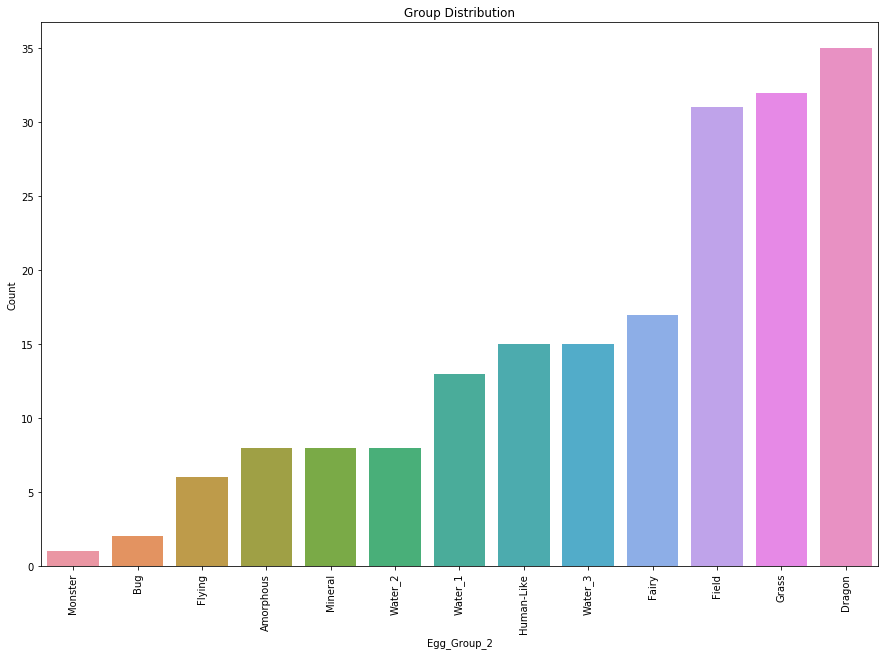

In [22]:
df4 = df.groupby('Egg_Group_2')['Egg_Group_2'].count().reset_index(name='Count')
df4 = df4.sort_values(by='Count')
plt.figure(figsize=(15, 10))
sns.barplot(x=df4['Egg_Group_2'], y=df4['Count'])
plt.xticks(rotation=90)
plt.xlabel('Egg_Group_2')
plt.ylabel('Count')
plt.title('Group Distribution')


In [0]:
import sys
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.utils.data as utils



In [0]:
df = pd.read_csv("pokemon_alopez247.csv", sep=",")



In [25]:
print(df.head(6))
print(df.info())


   Number        Name Type_1  ... Weight_kg  Catch_Rate      Body_Style
0       1   Bulbasaur  Grass  ...       6.9          45       quadruped
1       2     Ivysaur  Grass  ...      13.0          45       quadruped
2       3    Venusaur  Grass  ...     100.0          45       quadruped
3       4  Charmander   Fire  ...       8.5          45  bipedal_tailed
4       5  Charmeleon   Fire  ...      19.0          45  bipedal_tailed
5       6   Charizard   Fire  ...      90.5          45  bipedal_tailed

[6 rows x 23 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
Number              721 non-null int64
Name                721 non-null object
Type_1              721 non-null object
Type_2              350 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def        

  # Prediction

  ## 1.  Data preprocessed


  Convert text labels to one hot code.

  选择one hot的原因 [Reason](http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example)


In [0]:
df1 = df.copy()

df1 = pd.get_dummies(data=df1, columns=['Type_1', 'Type_2'], prefix='Type')
df1 = pd.get_dummies(data=df1, columns=['Color'], prefix='Color')
df1 = pd.get_dummies(data=df1, columns=['Egg_Group_1', 'Egg_Group_2'], prefix='Egg_Group')
df1 = pd.get_dummies(data=df1, columns=['Body_Style'], prefix='Body_Style')
df1 = df1.fillna(0)


  Generate X and y from the dataset.

In [27]:
# X = df1.loc[:, df1.columns != 'Name']
X = df1.drop(['Name', 'Number', 'Catch_Rate'], axis=1).to_numpy().astype(float)
labels = df1.drop(['Name', 'Number', 'Catch_Rate'], axis=1).columns
y = df1.Catch_Rate.to_numpy() / 255
n_sample = X.shape[0]
n_channel = X.shape[1]
print(f'Number of samples: {n_sample}\nNumber of features: {n_channel}')


Number of samples: 721
Number of features: 102


  ## 2. Linear prediction



  ### a. Basic linear regression

  First do the normalization. Then do the linear regression.

Train score is 0.974636388478952, test score is 0.9616833020611844.


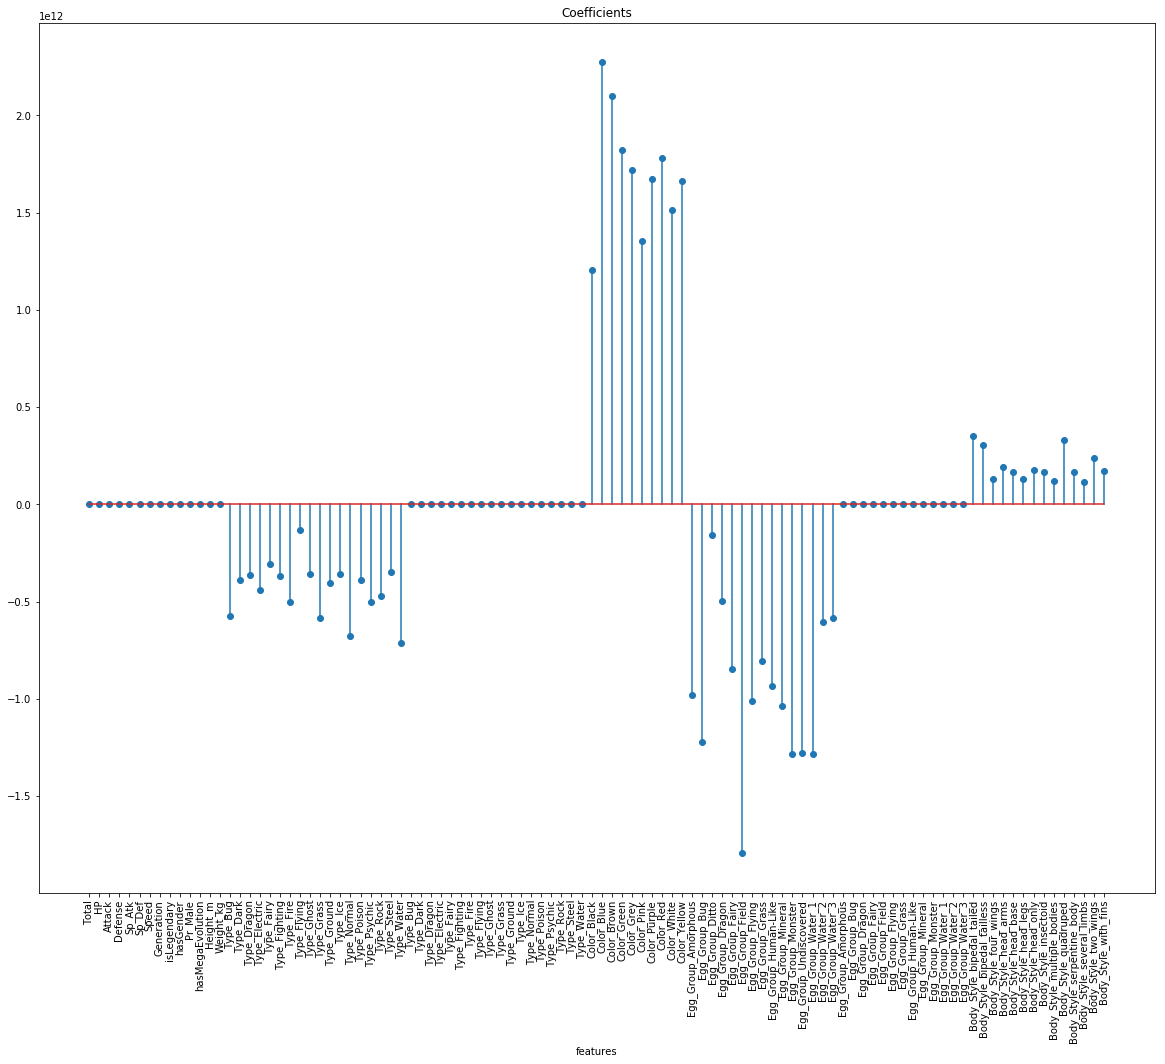

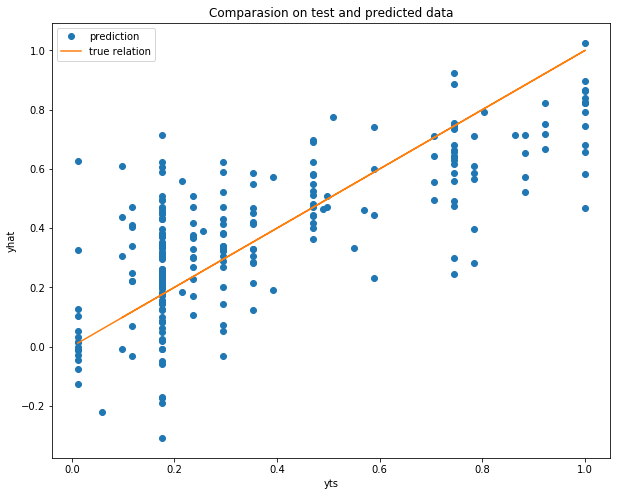

In [28]:
scaling = StandardScaler()
scaling.fit(X)
X_n = scaling.transform(X)


def score(model, x, y):
    return 1 - np.mean((model.predict(x) - y)**2)


n_run = 5
train_scores = []
test_scores = []
coeffs = []
for i in range(n_run):
    Xtr, Xts, ytr, yts = train_test_split(X_n, y, test_size=0.33, shuffle=True)
    regr = LinearRegression()
    regr.fit(Xtr, ytr)
    yhat = regr.predict(Xts)
    train_scores.append(score(regr, Xtr, ytr))
    test_scores.append(score(regr, Xts, yts))
    coeffs.append(regr)

# print(test_scores)
print(f"Train score is {np.max(train_scores)}, test score is {np.max(test_scores)}.")
best = np.argmax(test_scores)
best_coef = coeffs[best].coef_
# print(best_coef)
plt.figure(figsize=(20, 16))
plt.stem(best_coef)
plt.xlabel('features')
# plt.ylabel('$log(coef)$')
plt.title('Coefficients')
plt.xticks(range(n_channel), labels, rotation=90)
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(yts, coeffs[best].predict(Xts), 'o')
plt.plot(yts,yts)
plt.xlabel('yts')
plt.ylabel('yhat')
plt.title('Comparasion on test and predicted data')
plt.legend(['prediction', 'true relation'])
plt.show()


  ### b. Linear regression with LASSO

Best train score is 0.9732474155729648, test  score is 0.9677208499056017.
Six most prominent features are Total, Pr_Male, Egg_Group_Monster, Egg_Group_Undiscovered, Type_Ghost, Egg_Group_Ditto


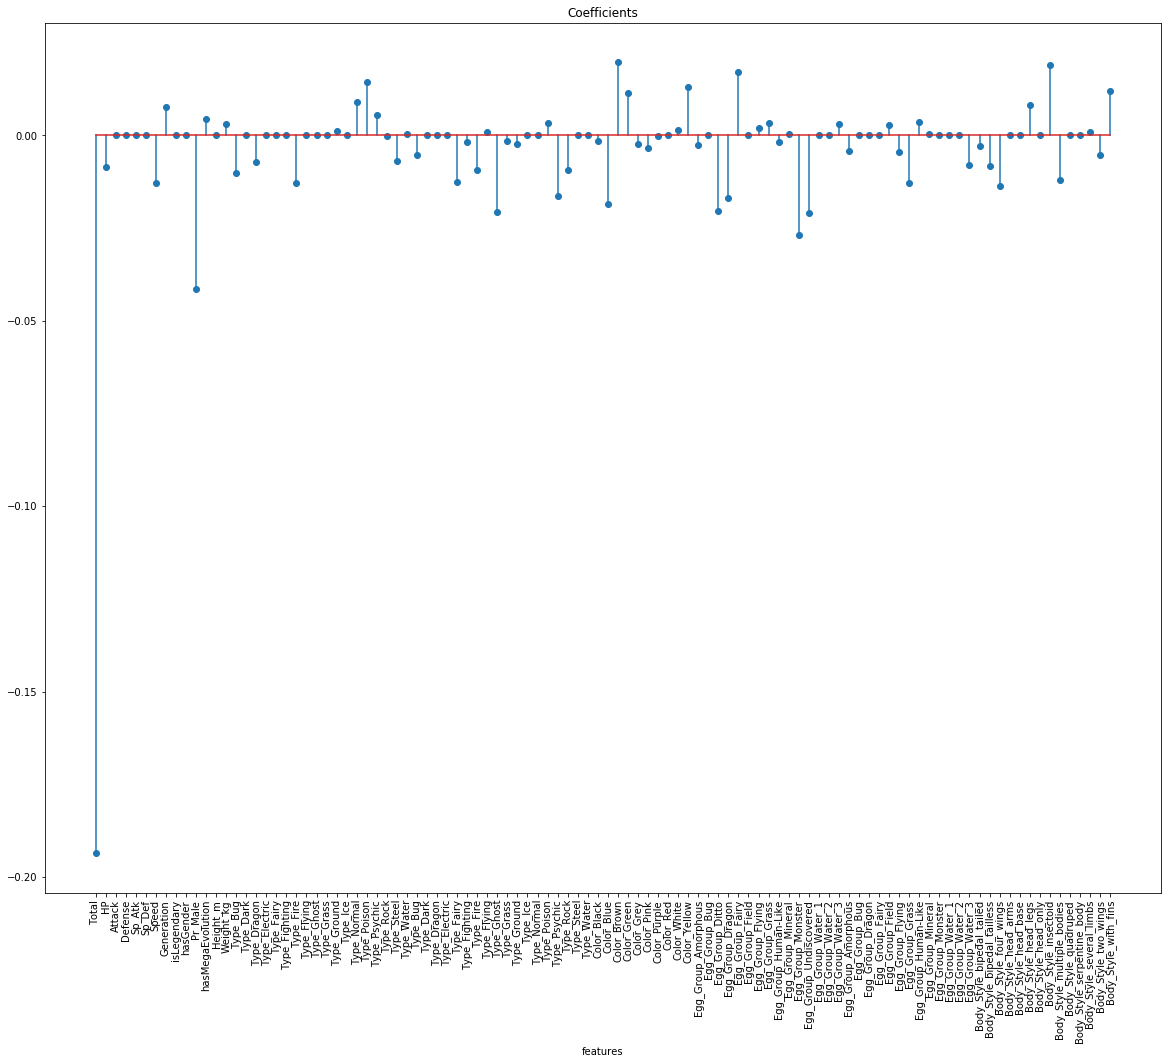

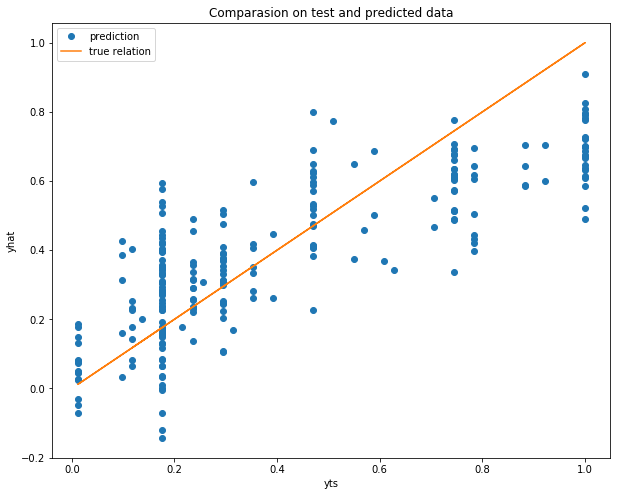

In [29]:
nalpha = 10
alphas = np.logspace(-3, 2, nalpha)

train_scores = []
test_scores = []
coeffs = []

for alpha in alphas:
    for i in range(n_run):
        Xtr, Xts, ytr, yts = train_test_split(X_n, y, test_size=0.33, shuffle=True)
        #     print(f"calculating alpha for {alpha}")
        regr = Lasso(alpha=alpha)
        regr.fit(Xtr, ytr)
        #     print(f"Done {alpha}")
        yts_pred = regr.predict(Xts)
        train_scores.append(score(regr, Xtr, ytr))
        test_scores.append(score(regr, Xts, yts))
        coeffs.append(regr)

print(f"Best train score is {np.max(train_scores)}, test  score is {np.max(test_scores)}.")
best = np.argmax(test_scores)
best_coef = coeffs[best].coef_
# print(best_coef)
prominent_labels = labels[np.abs(best_coef).argsort()[-6:]][::-1]
print(f"Six most prominent features are {', '.join(prominent_labels)}")
plt.figure(figsize=(20, 16))
plt.stem(best_coef)
plt.xlabel('features')
# plt.ylabel('$log(coef)$')
plt.title('Coefficients')
plt.xticks(range(n_channel), labels, rotation=90)
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(yts, coeffs[best].predict(Xts), 'o')
plt.plot(yts,yts)
plt.xlabel('yts')
plt.ylabel('yhat')
plt.title('Comparasion on test and predicted data')
plt.legend(['prediction', 'true relation'])
plt.show()


  ### c. Linear regression with Ridge

Best train score is 0.9758948312606975, test score is 0.9668559838842328.
Six most prominent features are Speed, Pr_Male, Total, HP, isLegendary, Egg_Group_Undiscovered


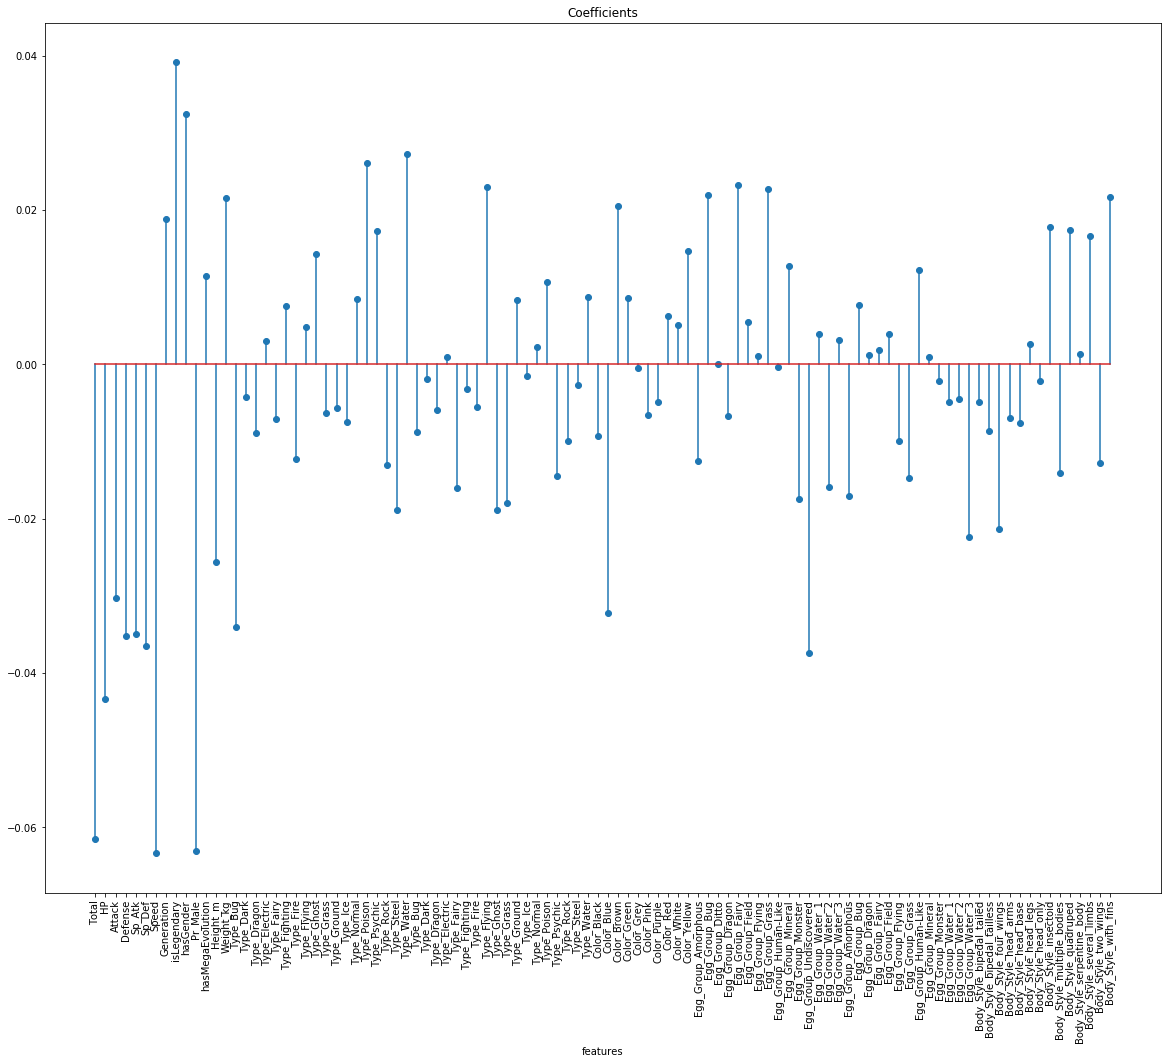

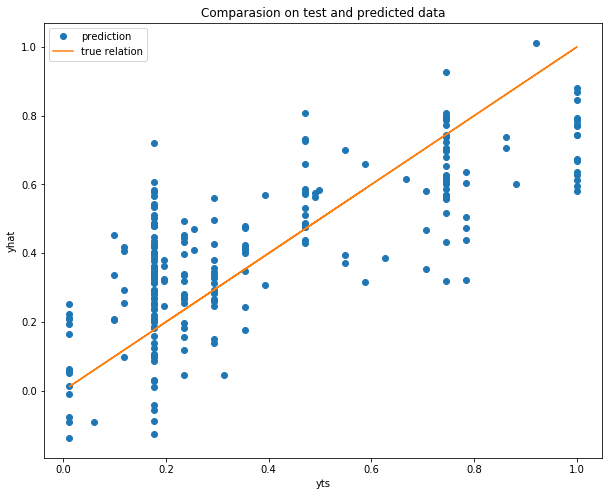

In [30]:
nalpha = 20
alphas = np.logspace(-2, 2, nalpha)

train_scores = []
test_scores = []
coeffs = []

for alpha in alphas:
    for i in range(n_run):
        Xtr, Xts, ytr, yts = train_test_split(X_n, y, test_size=0.33, shuffle=True)
        regr = Ridge(alpha=alpha)
        regr.fit(Xtr, ytr)
        train_scores.append(score(regr, Xtr, ytr))
        test_scores.append(score(regr, Xts, yts))
        coeffs.append(regr)

print(f"Best train score is {np.max(train_scores)}, test score is {np.max(test_scores)}.")
best = np.argmax(test_scores)
best_coef = coeffs[best].coef_
# print(best_coef)
prominent_labels = labels[np.abs(best_coef).argsort()[-6:]][::-1]
print(f"Six most prominent features are {', '.join(prominent_labels)}")
plt.figure(figsize=(20, 16))
plt.stem(best_coef)
plt.xlabel('features')
# plt.ylabel('$log(coef)$')
plt.title('Coefficients')
plt.xticks(range(n_channel), labels, rotation=90)
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(yts, coeffs[best].predict(Xts), 'o')
plt.plot(yts,yts)
plt.xlabel('yts')
plt.ylabel('yhat')
plt.title('Comparasion on test and predicted data')
plt.legend(['prediction', 'true relation'])
plt.show()


  ### d. Linear regression with PCA

In [0]:
n_run = 10

# Number of PCs to try
ncomp_test = np.arange(2, 100)
num_nc = len(ncomp_test)

train_scores = []
test_scores = []
coeffs = []

for ncomp in ncomp_test:
    for i in range(n_run):
        Xtr, Xts, ytr, yts = train_test_split(X_n, y, test_size=0.33, shuffle=True)
        pca = PCA(n_components=ncomp, svd_solver='randomized', whiten=True)
        Xtr_transform = pca.fit_transform(Xtr)

        regr = LinearRegression()
        regr.fit(Xtr_transform, ytr)
        Xts_transform = pca.fit_transform(Xts)

        train_scores.append(score(regr, Xtr_transform, ytr))
        test_scores.append(score(regr, Xts_transform, yts))
        coeffs.append(regr.coef_)



Best train  score is 0.9749101980907205, test score is 0.9535702528151085.


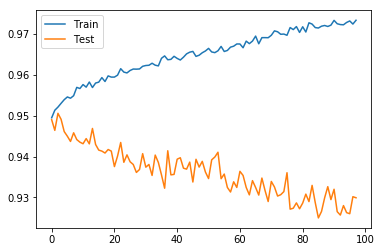

In [32]:
# best = np.argmax(acc)
print(f"Best train  score is {np.max(train_scores)}, test score is {np.max(test_scores)}.")
# print(train_scores)
# print(test_scores)
train_scores = np.array(train_scores).reshape(num_nc, -1)
test_scores = np.array(test_scores).reshape(num_nc, -1)

# keep biggest 6 and compute their mean
train_mean = np.sort(train_scores)[:, :4:-1].mean(axis=1)
test_mean = np.sort(test_scores)[:, :4:-1].mean(axis=1)
plt.plot(train_mean)
plt.plot(test_mean)
plt.legend(['Train', 'Test'])
plt.show()


  ### e. With neural network

Running on device cuda:0


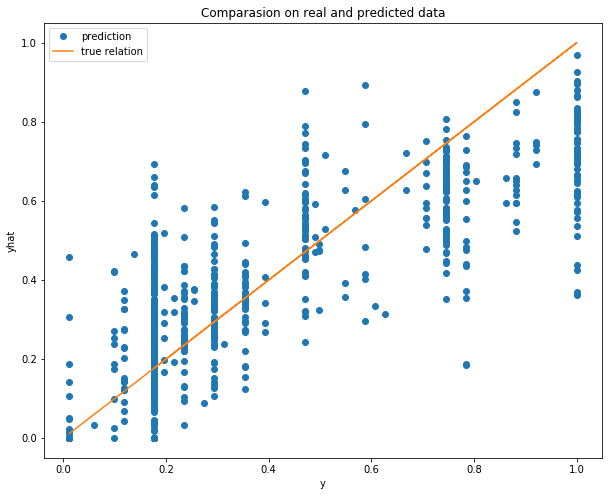

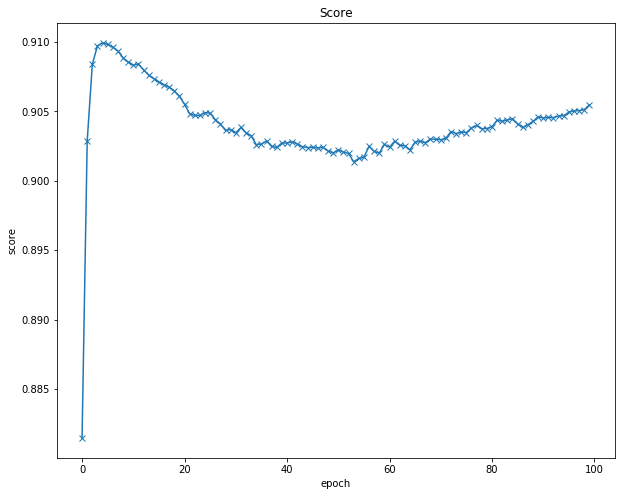

In [33]:


class Net(nn.Module):
    def __init__(self, n):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(n, 1000),
            nn.ReLU(),
            nn.Linear(1000,1000),
            nn.ReLU(),
            nn.Linear(1000,1),
            nn.ReLU()
        )


    def forward(self, x):
        return self.net(x)


lr = 0.001

epochs = 100
batch_size = 50
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

dataset = utils.TensorDataset(torch.Tensor(X_n), torch.Tensor(y))
dataloader = utils.DataLoader(dataset, batch_size=50, shuffle=True)

print(f"Running on device {device}")

# Use GPU
model = Net(X_n.shape[1]).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.MSELoss()
train_scores = []
losses = []

for epoch in range(1, epochs + 1):
    epoch_loss = 0
    score = 0
    model = model.train()
    for index, data in enumerate(dataloader):
        x_, y_ = data
        x_, y_ = x_.to(device), y_.to(device)
        pred = model(x_).view(-1)
#         print(y_.shape, pred.shape)
        loss = criterion(pred, y_)
#         loss = torch.mean((pred - y_)**2)
        epoch_loss += loss.item()

        # print(f"{index*batch_size:.4f} --- loss: {loss.item()/batch_size:.6f}")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    with torch.no_grad():
        X_val = torch.FloatTensor(X_n).to(device)
        result = model(X_val)
        pred = result.cpu().numpy()
        # score = r2_score(y, pred)
        score = 1 - np.mean((y - pred[0, :])**2)
    train_scores.append(score)
    losses.append(epoch_loss / len(dataset))
#     print(f'Epoch {epoch} finished! Loss: {epoch_loss / len(dataset):.4f} Score: {score:.6f}')
    torch.save(model.state_dict(), 'saved.model')


with torch.no_grad():
      X_val = torch.FloatTensor(X_n).to(device)
      result = model(X_val)
      pred = result.cpu().numpy()
      plt.figure(figsize=(10, 8))
      plt.plot(y, pred, 'o')
      plt.plot(y,y)
      plt.xlabel('y')
      plt.ylabel('yhat')
      plt.title('Comparasion on real and predicted data')
      plt.legend(['prediction', 'true relation'])
      plt.show() 
      
plt.figure(figsize=(10, 8))
plt.plot(train_scores,'x-')
# plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('score')
plt.title('Score')
# plt.legend(['Score', 'Loss'])

plt.show()


